<a href="https://colab.research.google.com/github/Ionicburn/adsp-mit/blob/main/RobertKellogg_CapstonePrjDeepLeanringCNN_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Malaria Detection
## Context
Malaria is a contagious disease caused by Plasmodium parasites that are transmitted to humans
through the bites of infected female Anopheles mosquitoes. The parasites enter the blood and begin
damaging red blood cells (RBCs) that carry oxygen, which can result in respiratory distress and other
complications. The lethal parasites can stay alive for more than a year in a person’s body without
showing any symptoms. Therefore, late treatment can cause complications and could even be fatal.
Almost 50% of the world’s population is in danger from malaria. There were more than 229 million
malaria cases and 400,000 malaria-related deaths reported over the world in 2019. Children under 5
years of age are the most vulnerable population group affected by malaria; in 2019 they accounted
for 67% of all malaria deaths worldwide.
Traditional diagnosis of malaria in the laboratory requires careful inspection by an experienced
professional to discriminate between healthy and infected red blood cells. It is a tedious,
time-consuming process, and the diagnostic accuracy (which heavily depends on human expertise)
can be adversely impacted by inter-observer variability.
An automated system can help with the early and accurate detection of malaria. Applications of
automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) have
consistently shown higher accuracy than manual classification. It would therefore be highly beneficial
to propose a method that performs malaria detection using Deep Learning Algorithms.


## Objective
Build an efficient computer vision model to detect malaria. The model should identify whether the
image of a red blood cell is that of one infected with malaria or not, and classify the same as
parasitized or uninfected, respectively.
## About the dataset
There are a total of 24,958 train and 2,600 test images (colored) with an equal number of parasitized
and uninfected instances, where:

● The parasitized cells contain the Plasmodium parasite

● The uninfected cells are free of the Plasmodium parasites but could contain other impurities
Note:
1. The images in the dataset are not of equal sizes. We will resize the images to 224x224, which
is the standard input image size of the majority of pre-trained CNN models.
2. These images require some preprocessing before they can be used in Google Colab. The
code for the same is given below.



In [1]:
!git clone https://github.com/Ionicburn/adsp-mit.git

fatal: destination path 'adsp-mit' already exists and is not an empty directory.


# Import Library Files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Check version of tensor flow
print(tf.__version__)

2.5.0


# EDA 


In [ ]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
#Storing the path of the extracted "train" folder 
images_dir = '/content/adsp-mit/malaria_cells'

#Size of image so that each image has the same size
SIZE = 224

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
len(images_ds), len(images_labels)

(27558, 27558)

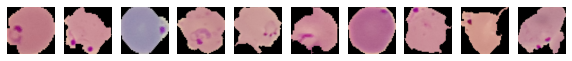

label for each of the above image: [1 1 1 1 1 1 1 1 1 1]


In [ ]:
# visualizing the first 10 images in the train dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images_ds[i]) 
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (images_labels[0:10]))

In [ ]:
# Check the split of 0 and 1 in train_labels 
a = images_labels_saved
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 13779, 1: 13779}

In [ ]:
df = pd.DataFrame(images_labels_saved, columns = ['class'])


In [ ]:
cat_col = ['class']

for col in cat_col:
  print(df[col].value_counts(normalize = True))
  print('*'*40)

1    0.5
0    0.5
Name: class, dtype: float64
****************************************


# Data Preparation

In [ ]:
# Choosing to use Keras Image Data Generator for image and label processing.
# It will make easier to split and shuffle train and test images with labels
# This will also make any image augmentation more efficient

img_width = 64  # variable to resize image width
img_height = 64 # variable to resize image height

# datagen variable loaded with rescaling images for normalization and reserve
# 20% of data for validation
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split=0.2)

In [ ]:
train_images = datagen.flow_from_directory(directory = '/content/adsp-mit/malaria_cells',
                                           target_size = (img_width, img_height)
                                           ,class_mode = 'binary'
                                           ,batch_size = 16
                                           ,subset = 'training'
                                           ,classes = ['unifected','parasitized']
                                           )

Found 11024 images belonging to 2 classes.


In [ ]:
test_images = datagen.flow_from_directory(directory = '/content/adsp-mit/malaria_cells',
                                           target_size = (img_width, img_height)
                                           ,class_mode = 'binary'
                                           ,batch_size = 16
                                           ,subset = 'validation'
                                           ,classes = ['unifected','parasitized']
                                           )

Found 2755 images belonging to 2 classes.


In [ ]:
no_samples, no_labels = train_images.samples, len(train_images.labels)
print("Number of images in training", no_samples)
print("Number of labels in training", no_labels)

Number of images in training 11024
Number of labels in training 11024


In [ ]:
no_samples, no_labels = test_images.samples, len(test_images.labels)
print("Number of images in testing", no_samples)
print("Number of labels in testning", no_labels)

Number of images in testing 2755
Number of labels in testning 2755


In [ ]:
print(train_images.class_indices)
print(test_images.class_indices)

{'unifected': 0, 'parasitized': 1}
{'unifected': 0, 'parasitized': 1}


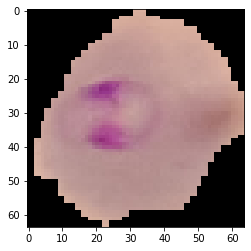

1


In [ ]:
x,y = train_images[0]
image = x[0]
plt.imshow(image)
plt.show()
print(train_images.labels[0])

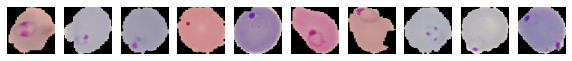

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# visualizing the first 10 images in the train dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x[i], cmap="gray")
    plt.axis('off')
plt.show()
print(y)

# Model Building

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 16, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape = (64,64,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(2, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer= adam, metrics =['accuracy'])
    
    return model

In [ ]:
#Build the model
model_1 = cnn_model_1()

In [ ]:
#Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

In [ ]:
history_model_1 = model_1.fit_generator(generator=train_images
                                        ,steps_per_epoch = len(train_images))

In [ ]:
history_model_1 = model_1.fit(train_images, train_images.labels, validation_split=0.2, batch_size=16, verbose=1, epochs=10)